In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv('music.csv')
X = data.drop(columns=['genre'])
y = data['genre']

model = DecisionTreeClassifier(max_depth=3, random_state=40)

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
pred = model.predict(X_test)
print(pred)
score = accuracy_score(y_test, pred)
score

['HipHop' 'Acoustic' 'Classical' 'Jazz']


1.0

# House price predictor

In [3]:
housing = pd.read_csv('housing.csv')
housing

,CRIM,ZIN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZIN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIM,ZIN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.281549,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703943,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.202000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZIN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

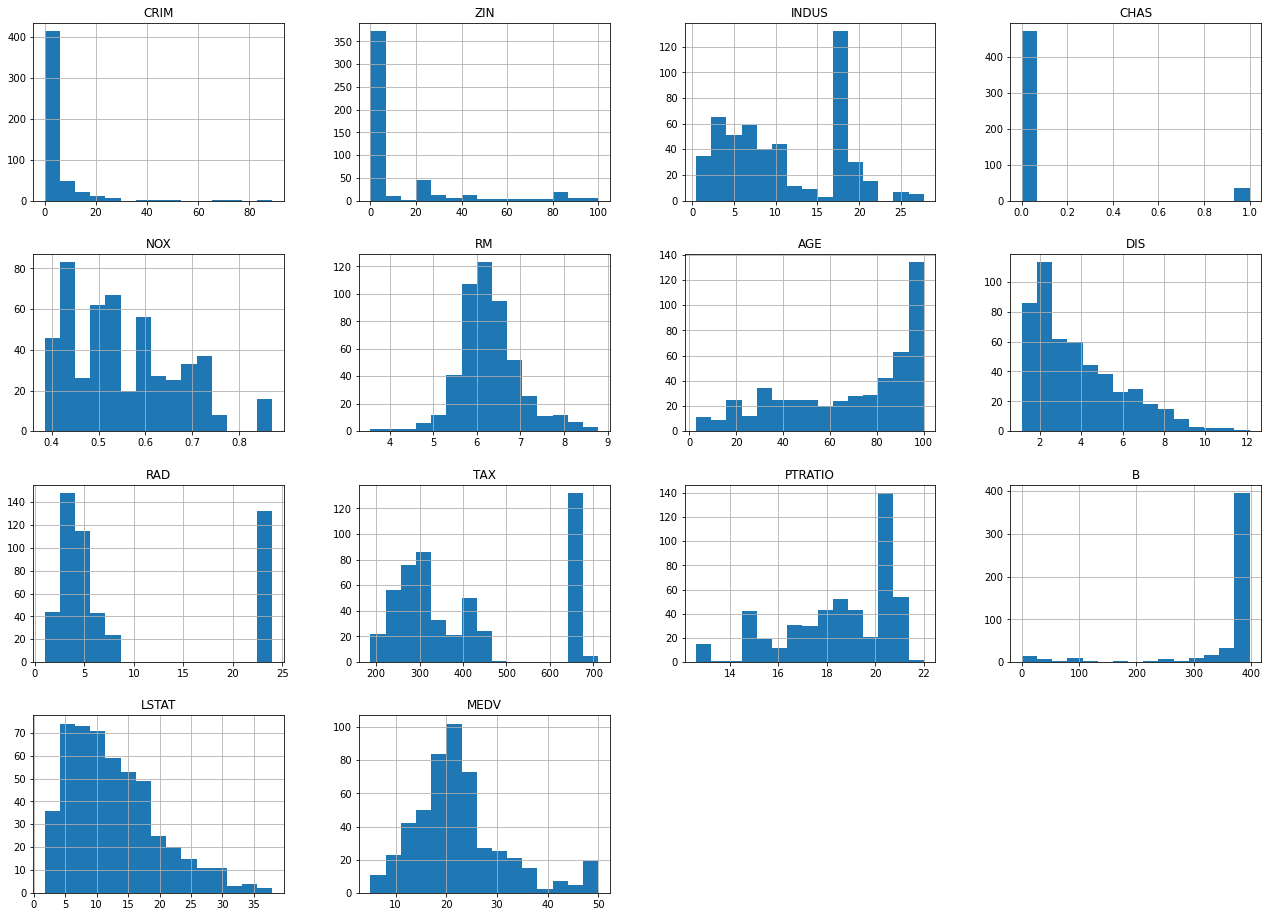

In [6]:
housing.hist(bins=15, figsize=(22,16))

In [7]:
# this is how train test split is work in sklearn
def train_test_split(data, test_data):
    shuffeled = np.random.permutation(len(data))
    np.random.seed(42)
    print(shuffeled)
    test_set_size = int(len(data) * test_data)
    test_size = shuffeled[:test_set_size]
    train_size = shuffeled[test_set_size:]
    return data.iloc[test_size], data.iloc[train_size] 

In [8]:
train_data, test_data = train_test_split(housing, 0.2)

[326 115 349 193 426  85 210  63 289 346 179 199 285 226 363  39 402 155
 143 385 396 138 213 352 163 220 407 433 417 282 235  84 135 500   4 230
 252 256 311 196 244  16 414 303  34 358 375 224 208 490 335 400 489 126
 207 306 178 203 159  92 171 248 136 167 382 145 416 439 406 251  71 292
 458 387 140  48  99 275 347 249 460 411 205 434 261  35 484 497  97 141
 419 109 187  38 271 286  36  49 428 462 389 245 369 383  73 180 338 341
  87 214 160 191  11 170 105 495 360  14 269 219 461  45 438 337  18 464
 293 422 421 470 325  37 379  43 121 304 348 295 371  23 429 253   7 165
 315 493 192 403 331 175 503  78 501  13  15 399 173 365   1 204 370  22
 412 333 299 314 420 189 453 273 381  91 129  41 321 177 378  46 313 408
 498 398 442 456 231 148 259 228 298 172 441  86 149 486  74  24 137 366
 169 185 476 309 254  19 415 211 474  65 322 330  55 405 302 266 217 152
 270 242   8  25  30 454  82 103 268 430 324 183 168 339 480  20 288 243
 327 380 372 388 233 410 301 272 308 142  59  72  5

In [ ]:
from sklearn.model_selection import train_test_split
X = housing.drop(columns=['MEDV'])
y = housing['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index , test_index in split.split(housing, housing['CHAS']):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

In [ ]:
train_set['CHAS'].shape

In [ ]:
test_set['CHAS'].shape

In [ ]:
housing = train_set

In [ ]:
housing

In [ ]:
376/28

In [ ]:
95/7

# looking for correlations

In [ ]:
co_matrix = housing.corr()

In [ ]:
co_matrix = housing.corr()
co_matrix['MEDV'].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix
attribute = ['MEDV','RM', 'ZIN', 'LSTAT']

In [ ]:
scatter_matrix(housing[attribute], figsize=(13,8))

In [ ]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.7)

In [ ]:
housing['TAXRM'] = housing['TAX'] / housing['RM']
housing = housing.drop(['TAXRM'], axis=1)

In [ ]:
co_matrix = housing.corr()
co_matrix['MEDV'].sort_values(ascending=False)

In [ ]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.7)

In [ ]:
housing_train = train_set.drop('MEDV', axis=1)
housing_label = train_set['MEDV']

## Missing Values Handling

In [ ]:
# option 1
a = housing.dropna(subset=['RM'])
a.shape

In [ ]:
#option 2
b = housing.drop('RM', axis=1)
b.shape

In [ ]:
#option 3

In [ ]:
median = housing['RM'].median()

In [ ]:
median

In [ ]:
housing['RM'].fillna(median)

In [ ]:
housing.describe()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

In [ ]:
 imputer.statistics_

In [ ]:
X = imputer.transform(housing)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [ ]:
housing_tr.describe()

## Feature Scaling

## Creating pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('Imputer', SimpleImputer(strategy='median')),
                       # ...add as many feature as many you want
                       ('StandardScaler', StandardScaler())
                      ])

In [ ]:
housing_num = my_pipeline.fit_transform(housing_tr)
housing_num

In [ ]:
housing_num

## Selecting a Model for Data from different model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
#model = SVR()
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num, housing_label)

In [ ]:
some_data = housing.iloc[:5]
label_data = housing_label.iloc[:5]
print(some_data)
label_data

In [ ]:
predict_data = my_pipeline.transform(some_data)
model.predict(predict_data)

In [ ]:
list(label_data)

## Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error
prediction = model.predict(housing_num)
MSE = mean_squared_error(housing_label, prediction)
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

## Using batter evaluation technique --> Cross-validations

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing_num, housing_label, scoring='neg_mean_squared_error', cv=10)
RMSE_score = np.sqrt(-score)

In [ ]:
RMSE_score # for DecisiontreeRegression

In [ ]:
RMSE_score  #LinearRegression

In [ ]:
RMSE_score #RandomForestRegressor

In [ ]:
RMSE_score #SVR

In [ ]:
def print_score(scores):
    print('Score', scores)
    print('Score', scores.mean())
    print('Standar devistion', scores.std())

In [ ]:
print(print_score(RMSE_score))

## Saving the model

In [ ]:
from joblib import dump, load
dump(model, 'Value_predicture.joblib')

## Model_Testing on Test Data

In [ ]:
X_test = test_set
y_test = test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
Final_prediction = model.predict(X_test)
final_mse = mean_squared_error(y_test, Final_prediction)
final_rmse = np.sqrt(final_mse)
print(Final_prediction)

In [ ]:
y_test